# Model Selection

### Get API Key

In [4]:
!pip install mistralai

In [5]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("MISTRAL_KEY")

- Note: in the classroom, if you print out this `api_key` variable, it is not a real API key (for security reasons).
- If you wish to run this code on your own machine, outside of the classroom, you can still reuse the code that you see in `helper.py`.
- It uses [python-dotenv](https://pypi.org/project/python-dotenv/) library to securely save and load sensitive information such as API keys.

In [9]:
import os
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage

def mistral(user_message, model="mistral-small-latest", is_json=False):
    client = MistralClient(api_key=secret_value_0)

    messages = [ChatMessage(role="user", content=user_message)]

    if is_json:
        chat_response = client.chat(
            model=model, messages=messages, response_format={"type": "json_object"}
        )
    else:
        chat_response = client.chat(model=model, messages=messages)

    return chat_response.choices[0].message.content

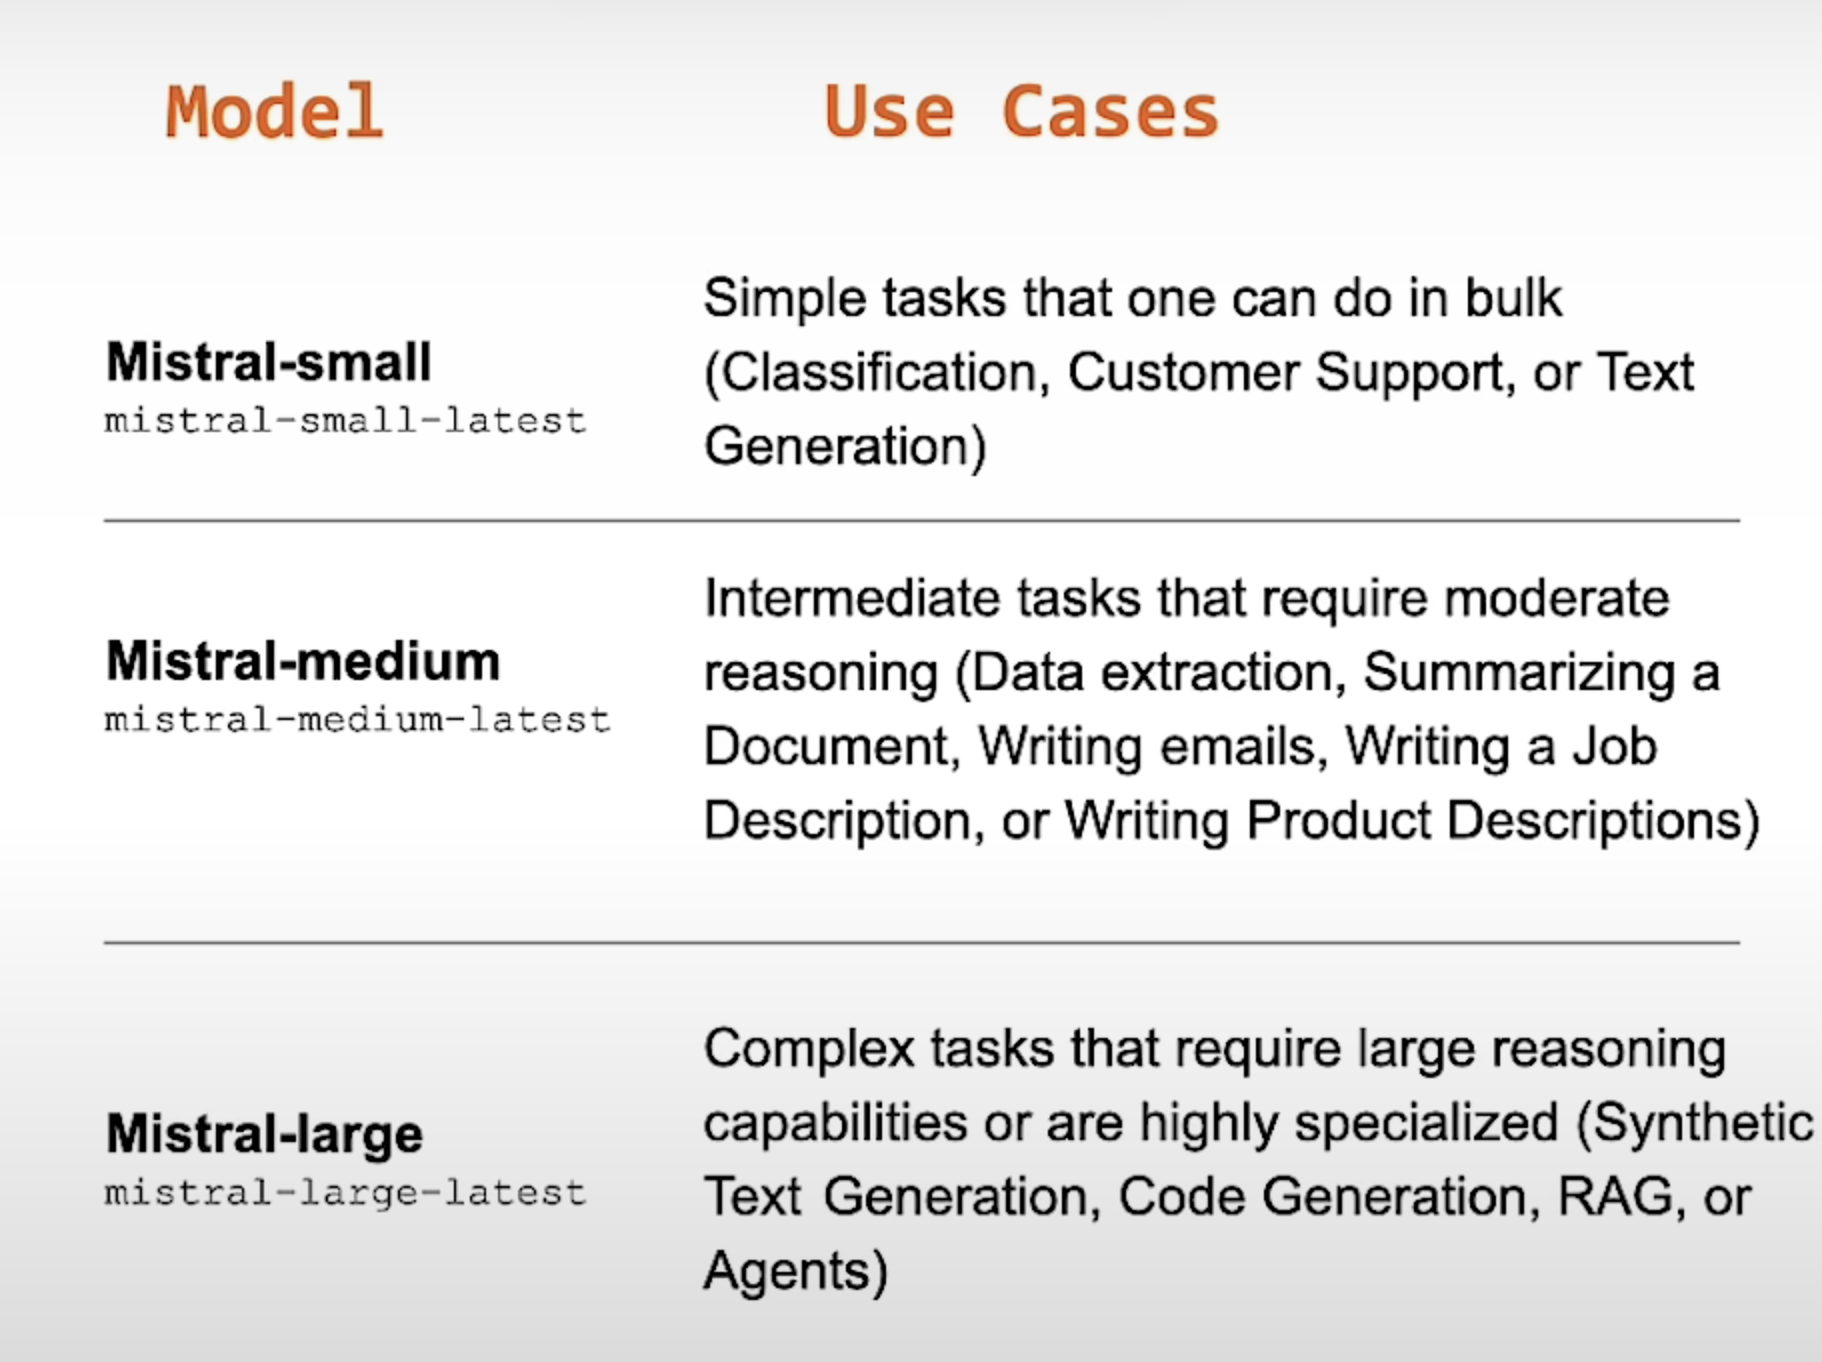

## Mistral Small

Good for simple tasks, fast inference, lower cost.
- classification

In [12]:
prompt = """
Classify the following email to determine if it is spam or not.
Only respond with the exact text "Spam" or "Not Spam". 

# Email:
🎉 Urgent! You've Won a $1,000,000 Cash Prize! 
💰 To claim your prize, please click on the link below: 
https://bit.ly/claim-your-prize
"""

In [13]:
mistral(prompt, model="mistral-small-latest")

'Spam'

## Mistral Medium

Good for intermediate tasks such as language transformation.
- Composing text based on provided context (e.g. writing a customer service email based on purchase information).

In [14]:
prompt = """
Compose a welcome email for new customers who have just made 
their first purchase with your product. 
Start by expressing your gratitude for their business, 
and then convey your excitement for having them as a customer. 
Include relevant details about their recent order. 
Sign the email with "The Fun Shop Team".

Order details:
- Customer name: Anna
- Product: hat 
- Estimate date of delivery: Feb. 25, 2024
- Return policy: 30 days
"""

In [15]:
response_medium = mistral(prompt, model="mistral-medium-latest")

In [16]:
print(response_medium)

Subject: Welcome to The Fun Shop, Anna! Your New Hat is On Its Way

Dear Anna,

We are thrilled to welcome you to The Fun Shop family! We are beyond grateful that you have chosen us for your shopping needs and appreciate your trust in our brand.

We are excited to let you know that your order for the hat has been processed and is on its way to you. You can expect to receive it by Feb. 25, 2024. We hope that you will love your new hat as much as we do!

In case you have any questions or concerns about your order, please don't hesitate to reach out to our customer service team. We are here to help you every step of the way.

Additionally, we want to remind you that we have a 30-day return policy. If for any reason you are not completely satisfied with your purchase, you can return it within 30 days of receipt for a full refund or exchange.

Thank you once again for choosing The Fun Shop. We look forward to serving you in the future!

Best regards,
The Fun Shop Team


## Mistral Large: 

Good for complex tasks that require advanced reasoning.
- Math and reasoning with numbers.

In [17]:
prompt = """
Calculate the difference in payment dates between the two \
customers whose payment amounts are closest to each other \
in the following dataset. Do not write code.

# dataset: 
'{
  "transaction_id":{"0":"T1001","1":"T1002","2":"T1003","3":"T1004","4":"T1005"},
    "customer_id":{"0":"C001","1":"C002","2":"C003","3":"C002","4":"C001"},
    "payment_amount":{"0":125.5,"1":89.99,"2":120.0,"3":54.3,"4":210.2},
"payment_date":{"0":"2021-10-05","1":"2021-10-06","2":"2021-10-07","3":"2021-10-05","4":"2021-10-08"},
    "payment_status":{"0":"Paid","1":"Unpaid","2":"Paid","3":"Paid","4":"Pending"}
}'
"""

In [18]:
response_small = mistral(prompt, model="mistral-small-latest")

In [19]:
print(response_small)

To find the difference in payment dates between the two customers whose payment amounts are closest to each other, follow these steps:

1. First, sort the payment_amount column in ascending order.
2. Compare adjacent rows in the sorted list to find the smallest difference in payment amounts.
3. Once you find the smallest difference in payment amounts, locate the corresponding payment_date for each customer.
4. Calculate the difference between the two payment_dates.

In this dataset:
- The smallest difference in payment amounts is between $120.0 and $125.5, which belong to customers C003 and C001, respectively.
- The payment_dates for these customers are 2021-10-07 and 2021-10-05.

So, the difference in payment dates between the two customers whose payment amounts are closest to each other is 2 days.


In [20]:
response_large = mistral(prompt, model="mistral-large-latest")

In [21]:
print(response_large)

Based on the provided dataset, the payment amounts closest to each other are from transaction_id T1001 and T1003, which are $125.50 and $120.00 respectively. The payment dates for these transactions are 2021-10-05 for T1001 and 2021-10-07 for T1003.

To calculate the difference in payment dates, subtract the earlier date from the later date. In this case, the difference between 2021-10-07 and 2021-10-05 is 2 days. Therefore, the difference in payment dates for the two customers whose payment amounts are closest to each other is 2 days.


## Expense reporting task

In [22]:
transactions = """
McDonald's: 8.40
Safeway: 10.30
Carrefour: 15.00
Toys R Us: 20.50
Panda Express: 10.20
Beanie Baby Outlet: 25.60
World Food Wraps: 22.70
Stuffed Animals Shop: 45.10
Sanrio Store: 85.70
"""

prompt = f"""
Given the purchase details, how much did I spend on each category:
1) restaurants
2) groceries
3) stuffed animals and props
{transactions}
"""

In [23]:
response_small = mistral(prompt, model="mistral-small-latest")
print(response_small)

To calculate your spending in each category, I've matched your purchases with the given categories as follows:

1) Restaurants:
- McDonald's: $8.40
- Panda Express: $10.20

Total spent on restaurants: $18.60

2) Groceries:
- Safeway: $10.30
- Carrefour: $15.00
- World Food Wraps: $22.70

Total spent on groceries: $48.00

3) Stuffed animals and props:
- Toys R Us: $20.50
- Beanie Baby Outlet: $25.60
- Stuffed Animals Shop: $45.10
- Sanrio Store: $85.70

Total spent on stuffed animals and props: $176.90

So, you spent $18.60 on restaurants, $48.00 on groceries, and $176.90 on stuffed animals and props.


In [24]:
response_large = mistral(prompt, model="mistral-large-latest")
print(response_large)

Based on the purchase details you provided, here's the breakdown of your spending in each category:

1) Restaurants:
   - McDonald's: $8.40
   - Panda Express: $10.20
   - World Food Wraps: $22.70
   Total spent on restaurants: $41.30

2) Groceries:
   - Safeway: $10.30
   - Carrefour: $15.00
   Total spent on groceries: $25.30

3) Stuffed animals and props:
   - Toys R Us: $20.50
   - Beanie Baby Outlet: $25.60
   - Stuffed Animals Shop: $45.10
   - Sanrio Store: $85.70
   Total spent on stuffed animals and props: $176.90


## Writing and checking code

In [25]:
user_message = """
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

Your code should pass these tests:

assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]
"""

In [26]:
print(mistral(user_message, model="mistral-large-latest"))

Here's a Python solution for the problem:

```python
def twoSum(nums, target):
    if len(nums) <= 1:
        return []

    num_dict = {}

    for i, num in enumerate(nums):
        if target - num in num_dict:
            return [num_dict[target - num], i]
        num_dict[num] = i

    return []
```

This code first checks if the length of the input list is less than or equal to 1. If yes, it returns an empty list as there won't be two numbers to add up to the target.

The code then creates an empty dictionary called `num_dict`. It iterates over the input list `nums` with indices and values using `enumerate()`. Inside the loop, it checks if the difference between the target and the current number is in the dictionary. If it is, that means we have found two numbers that add up to the target, so it returns their indices. If the difference isn't in the dictionary, it adds the current number and its index to the dictionary.

If no two numbers add up to the target after iterating over th

### Try out the code that the model provided
- Copy the code that the model provided and try running it!

Here is the code that was output at the time of filming:
```Python
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
```
- Also try running the assert statements in the original prompt
```Python
assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]
```

## Natively Fluent in English, French, Spanish, German, and Italian
- This means that you can use Mistral models for more than translating from one language to another.
- If you are a native Spanish speaker, for instance, you can communicate with Mistral models in Spanish for any of your tasks.

In [27]:
user_message = """
Lequel est le plus lourd une livre de fer ou un kilogramme de plume
"""

In [28]:
print(mistral(user_message, model="mistral-large-latest"))

Une livre de fer pèse environ 0,453 kilogramme, tandis qu'un kilogramme de plumes pèse un kilogramme. Donc un kilogramme de plumes est plus lourd qu'une livre de fer.

Cependant, il est important de noter que la densité du fer est beaucoup plus élevée que celle des plumes, ce qui signifie qu'une quantité donnée de fer prendra moins de place que la même quantité de plumes. Ainsi, bien que les plumes soient plus légères que le fer en termes de poids, elles prennent beaucoup plus de place pour atteindre ce même poids.


### Try it out for yourself
- Try communicating with the Mistral Large model in Spanish
  - (If you need help, you can first translate a prompt from English to Spanish, and then prompt the model in Spanish).

## List of Mistral models that you can call:

You can also call the two open source mistral models via API calls.
Here is the list of models that you can try:
```
open-mistral-7b
open-mixtral-8x7b
open-mixtral-8x22b
mistral-small-latest
mistral-medium-latest
mistral-large-latest
```

For example:
```Python
mistral(prompt, model="open-mixtral-8x22b")
```

Note that we just released the `open-mixtral-8x22b` model. Check out our [release blog](https://mistral.ai/news/mixtral-8x22b/) for details. 